**Numerical Methods in Science and Engineering**  
**Chapter:** 4  
**Exercise:** 12  
  
**Author:** Supakorn Suttiruang (Lum) 6031857321  
  

**Problem Statement:** 

From the data in the table as shown below, derive the interpolation functions by using  
(a) the Newton's divided differences method  
(b) the Lagrange polynomial method  
(c) the cubic spline method

| $x$ | $f(x)$ |
|-----|--------|
| 2   |  9.5   |
| 4   | 8.0    |
| 6   | 10.5   |
| 8   | 39.5   |
| 10  | 72.0   |

Plot the functions obtained from (a)-(c) together with the data points. Then, determine the values of these functions at $x=7$

**Derivation of Solution:** (The derivation of solution is included in the section below)

**Code Listing and Solution:** 


Preamble:

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['figure.dpi'] = 100
%config InlineBackend.figure_format = 'retina'

(a) the Newton's differences method

First, we define our unknown function from the given data table,

In [3]:
f = {2:9.5, 4:8.0, 6:10.5, 8:39.5, 10:72.0}

Then we define the divided difference operator as a recursive function,

In [4]:
def divided_difference(x_list: list, f: dict):
    if len(x_list) == 1:
        return f[x_list[0]]
    else:
        return (divided_difference(x_list[:-1], f) - divided_difference(x_list[1:], f)) / (x_list[0] - x_list[-1])

Now we're ready to define the nth-order polynomial interpolation,

In [5]:
def newton_nth_order_interpolation(x: float, f: dict):
    soln = 0
    x_points = list(f.keys())

    for i in range(len(x_points)):
        term = divided_difference(x_points[0:i+1], f)
        for j in x_points[0:i]:
            term *= (x - j)
        soln += term

    return soln

Now we plot the data table with Newton's divided difference method's interpolation,

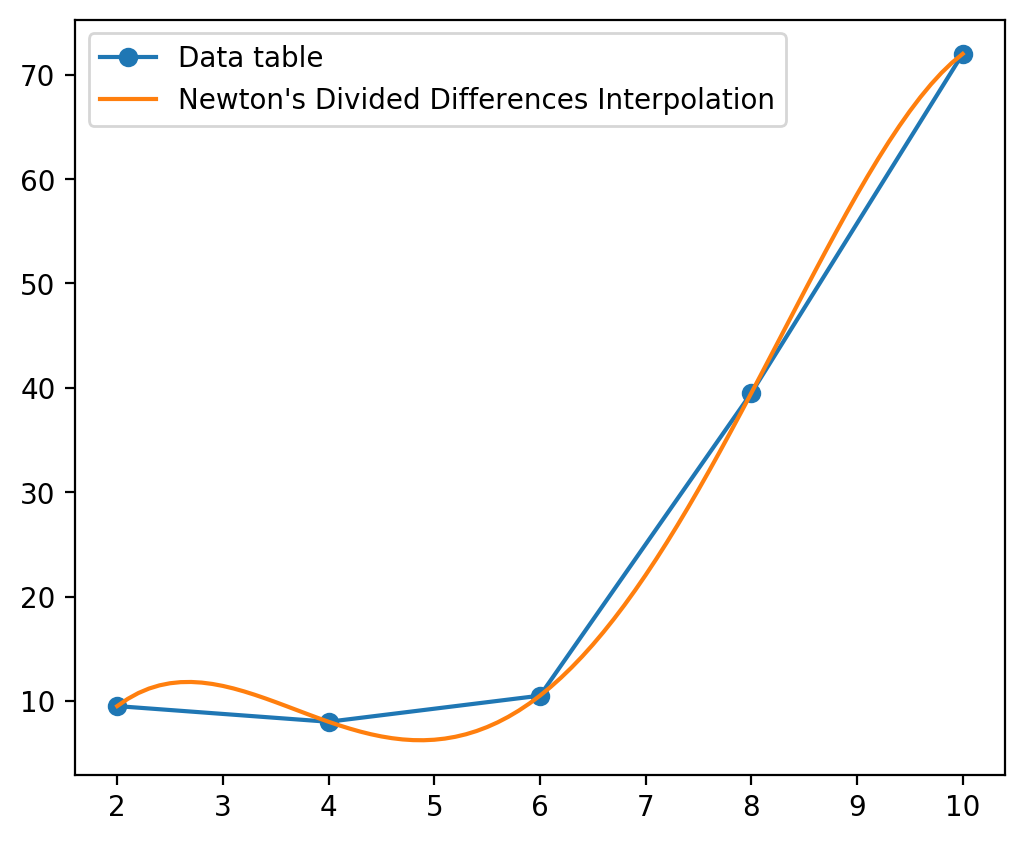

In [31]:
plt.plot(list(f.keys()), list(f.values()), '-o', label="Data table")

x_range = np.arange(2, 10 + 0.1, 0.1)

NDD = list(map(lambda x: newton_nth_order_interpolation(x, f), x_range))
plt.plot(x_range, NDD, label="Newton's Divided Differences Interpolation")

plt.legend()
plt.show()

(b) the Lagrange polynomial method

First we define the Lagrange interpolation function,

In [7]:
def lagrange_interpolation(i:int, x:float, f:dict):
    x_points = list(f.keys())
    result = 1
    
    for j in range(len(f)):
        if j != i:
            result *= (x - x_points[j]) / (x_points[i] - x_points[j])
    return result

Now we're ready to define the nth-order Lagrange interpolation,

In [8]:
def lagrange_nth_order_interpolation(x: float, f:dict):
    x_points = list(f.keys())
    result = 0
    for i in range(len(f)):
        result += lagrange_interpolation(i, x, f) * f[x_points[i]]
    return result

Now we plot method (a) and (b) in the same figure,

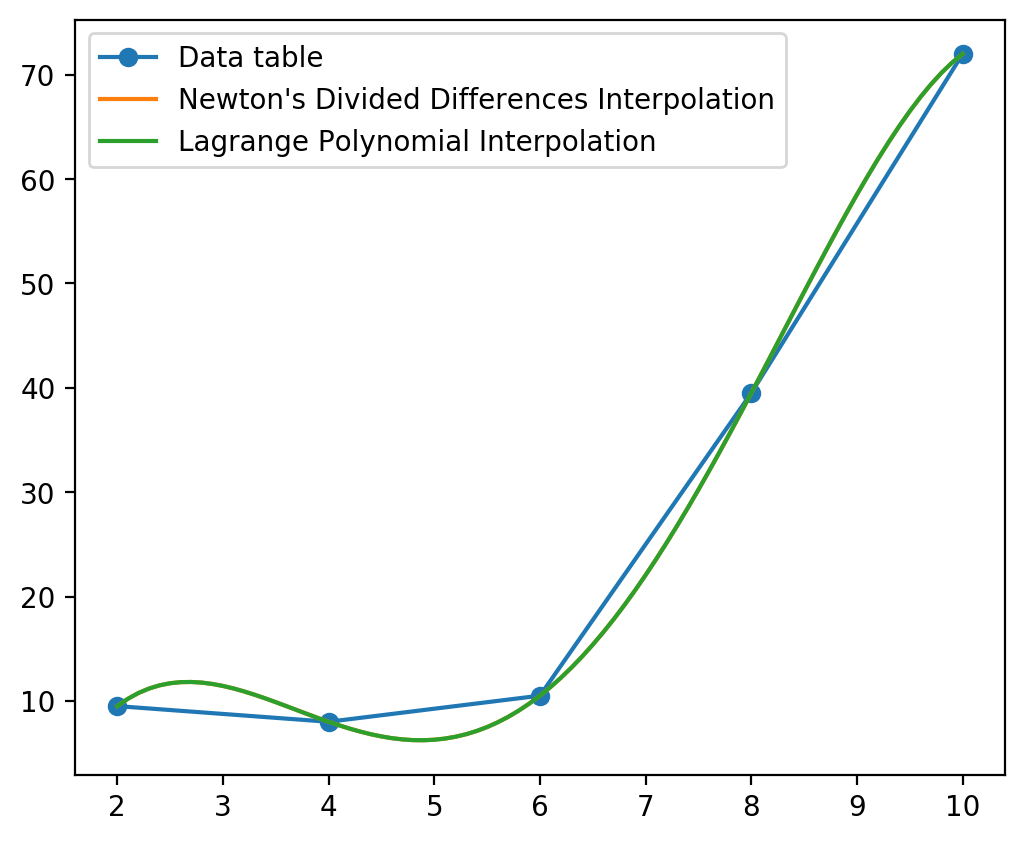

In [32]:
plt.plot(list(f.keys()), list(f.values()), '-o', label="Data table")

plt.plot(x_range, NDD, label="Newton's Divided Differences Interpolation")

LP = list(map(lambda x: lagrange_nth_order_interpolation(x, f), x_range))
plt.plot(x_range, LP, label="Lagrange Polynomial Interpolation")

plt.legend()
plt.show()

It looks like method (a) and (b) give nearly identical results

(c) the cubic spline method

This method involves complicated symbolic expression manipulation, so we will use `sympy` to solve it,

In [10]:
import sympy as sym

First, we define all of the required unknown coefficients of the cubic splines,

In [11]:
n = len(f)

a = sym.symbols('a1:{}'.format(n))
b = sym.symbols('b1:{}'.format(n))
c = sym.symbols('c1:{}'.format(n))
d = sym.symbols('d1:{}'.format(n))

display(a)
display(b)
display(c)
display(d)

(a1, a2, a3, a4)

(b1, b2, b3, b4)

(c1, c2, c3, c4)

(d1, d2, d3, d4)

For convenience, we also define an easier way to get the value of the function by giving the *position* of the x-value rather than by the value itself,

In [12]:
x_values = list(f.keys())

def idx_get(f:dict, idx: int):
    return f[x_values[idx]]

We now define all of the equations given by the requirements 4.4.3(a) to 4.4.3(e) to form a system of nonlinear equations,

Requirement 4.4.3(a): At any internal point, the values of the two cubic splines connected at that point must be equal,

In [13]:
req_a = []
for i in range(n-2):
    req_a.extend([
        # 4.43a
        (a[i] * x_values[i+1] ** 3) +
        (b[i] * x_values[i+1] ** 2) + 
        (c[i] * x_values[i+1]) +
        d[i] -
        idx_get(f, i+1)
        ,
        # 4.43b
        (a[i+1] * x_values[i+1] ** 3) +
        (b[i+1] * x_values[i+1] ** 2) + 
        (c[i+1] * x_values[i+1]) +
        d[i+1] -
        idx_get(f, i+1)
    ])
display(req_a)

[64*a1 + 16*b1 + 4*c1 + d1 - 8.0,
 64*a2 + 16*b2 + 4*c2 + d2 - 8.0,
 216*a2 + 36*b2 + 6*c2 + d2 - 10.5,
 216*a3 + 36*b3 + 6*c3 + d3 - 10.5,
 512*a3 + 64*b3 + 8*c3 + d3 - 39.5,
 512*a4 + 64*b4 + 8*c4 + d4 - 39.5]

Requirement 4.4.3(b): The first cubic spline must pass through the first data point $x_0$, and the last cubic spline must pass through the last data point $x_4$,

In [14]:
req_b = []
req_b.extend([
    # 4.44a
    (a[0] * x_values[0] ** 3) +
    (b[0] * x_values[0] ** 2) + 
    (c[0] * x_values[0]) +
    d[0] -
    idx_get(f, 0)
    ,
    # 4.44b
    (a[n-2] * x_values[n-1] ** 3) +
    (b[n-2] * x_values[n-1] ** 2) + 
    (c[n-2] * x_values[n-1]) +
    d[n-2] -
    idx_get(f, n-1)
])
display(req_b)

[8*a1 + 4*b1 + 2*c1 + d1 - 9.5, 1000*a4 + 100*b4 + 10*c4 + d4 - 72.0]

Requirement 4.4.3(c): At any internal point, the slopes of the two cubic splines connected at that point myst be equal,

In [15]:
req_c = []
for i in range(n-2):
    req_c.extend([
        # 4.45b
        (3 * a[i] * x_values[i+1] ** 2) + 
        (2 * b[i] * x_values[i+1]) +
        c[i]
        -
        (
        (3 * a[i+1] * x_values[i+1] ** 2) + 
        (2 * b[i+1] * x_values[i+1]) +
        c[i+1]
        )
    ])
display(req_c)

[48*a1 - 48*a2 + 8*b1 - 8*b2 + c1 - c2,
 108*a2 - 108*a3 + 12*b2 - 12*b3 + c2 - c3,
 192*a3 - 192*a4 + 16*b3 - 16*b4 + c3 - c4]

Requirement 4.4.3(d): At any internal point, the second derivatives of the two cubic splines connected at that point myst be equal,

In [16]:
req_d = []
for i in range(n-2):
    req_d.extend([
        # 4.46b
        (6 * a[i] * x_values[i+1]) + 
        (2 * b[i])
        -
        (
        (6 * a[i+1] * x_values[i+1]) + 
        (2 * b[i+1])
        )
    ])
display(req_d)

[24*a1 - 24*a2 + 2*b1 - 2*b2,
 36*a2 - 36*a3 + 2*b2 - 2*b3,
 48*a3 - 48*a4 + 2*b3 - 2*b4]

Requirement 4.4.3(e): The conditions of zero second-derivative for the cubic splines at the first and last data points may be assigned to produce two more conditions of

In [17]:
req_e = []
req_e.extend([
    # 4.46c
    (6 * a[0] * x_values[0]) + 
    (2 * b[0])
    ,
    (6 * a[n-2] * x_values[n-1]) + 
    (2 * b[n-2])
])
display(req_e)

[12*a1 + 2*b1, 60*a4 + 2*b4]

Now we combine all the requirements into one system of equation,

In [18]:
system = req_a + req_b + req_c + req_d + req_e

And solve the system of equation,

In [19]:
from sympy.solvers.solveset import nonlinsolve

soln = nonlinsolve(system, a + b + c + d)
soln = next(iter(soln))

In [20]:
soln

(-0.094866071428573, 0.974330357142857, -0.989955357142852, 0.110491071428568, 0.569196428571464, -12.2611607142857, 23.095982142857, -3.31473214285705, -1.50892857142865, 49.8125, -162.330357142857, 48.9553571428563, 11.0000000000001, -57.4285714285715, 366.857142857141, -196.571428571426)

Now we extract our solution,

In [21]:
def chunks(l, n):
    # This function devides the solution set into equal chunks
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [22]:
a_val = list(chunks(soln, n-1))[0]
b_val = list(chunks(soln, n-1))[1]
c_val = list(chunks(soln, n-1))[2]
d_val = list(chunks(soln, n-1))[3]
display(a_val)
display(b_val)
display(c_val)
display(d_val)

(-0.094866071428573, 0.974330357142857, -0.989955357142852, 0.110491071428568)

(0.569196428571464, -12.2611607142857, 23.095982142857, -3.31473214285705)

(-1.50892857142865, 49.8125, -162.330357142857, 48.9553571428563)

(11.0000000000001, -57.4285714285715, 366.857142857141, -196.571428571426)

Now we have all the cubic splines,

In [23]:
cubic_splines = []
for i in range(n-1):
    cubic_splines.append(
        lambda x, i=i: (a_val[i] * x**3) + (b_val[i] * x**2) + (c_val[i] * x) + d_val[i]
    )

We can now evaluate and plot the cubic splines,

In [24]:
CS = []
CS.extend([cubic_splines[0](x) for x in np.arange(2, 4, 0.1)])
CS.extend([cubic_splines[1](x) for x in np.arange(4, 6, 0.1)])
CS.extend([cubic_splines[2](x) for x in np.arange(6, 8, 0.1)])
CS.extend([cubic_splines[3](x) for x in np.arange(8, 10 + 0.1, 0.1)])

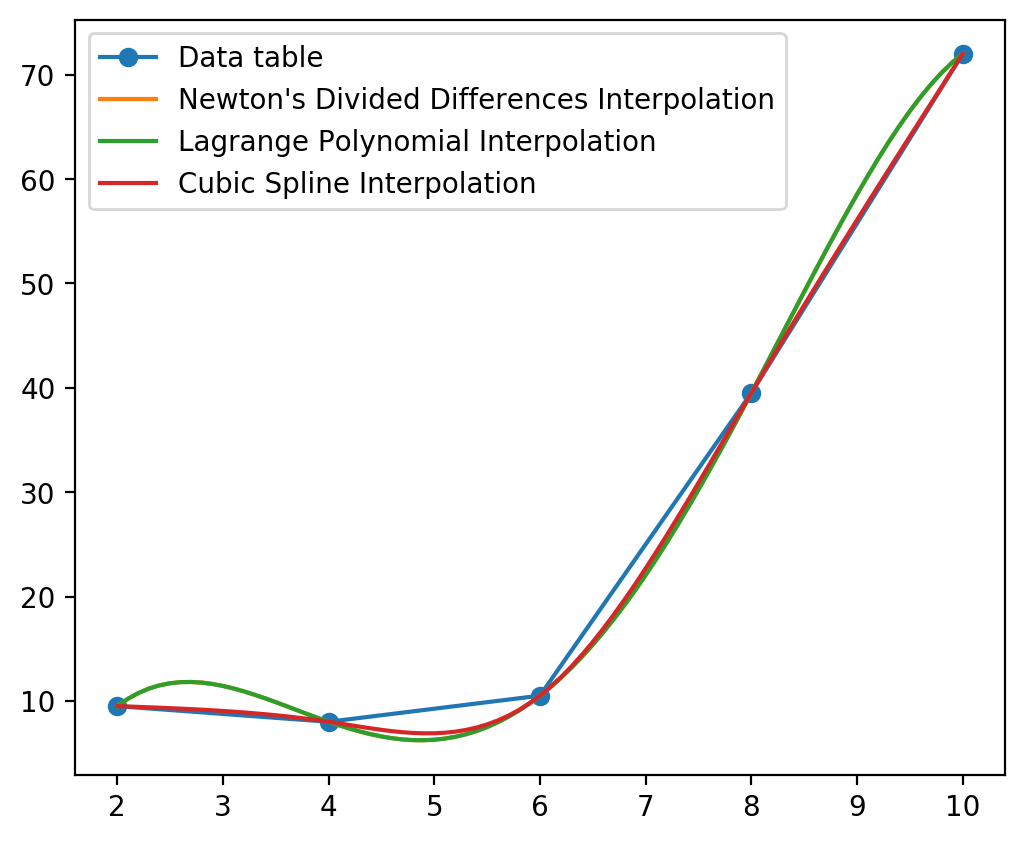

In [33]:
plt.plot(list(f.keys()), list(f.values()), '-o', label="Data table")

plt.plot(x_range, NDD, label="Newton's Divided Differences Interpolation")

plt.plot(x_range, LP, label="Lagrange Polynomial Interpolation")

plt.plot(x_range, CS, label="Cubic Spline Interpolation")

plt.legend()
plt.show()

Now we determine the value of the function at $x = 7$ for method (a)-(c), respectively,

In [26]:
newton_nth_order_interpolation(7, f)

22.05859375

In [27]:
lagrange_nth_order_interpolation(7, f)

22.05859375

In [28]:
cubic_splines[2](7)

22.6930803571427